In [1]:
# check if packages can be loaded, i.e. they are already installed
library(ISLR2) # contains data sets we might work with
library(rpart) # package for tree fitting
library(rpart.plot) # visualisation of tree structures
library(pROC) # you should know what it is good for!

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




2 Classification and regression trees (CART) with R

2.1 Brexit referendum results

In [2]:
load("./Data/Brexit.Rda")

points from a) to f)

In [3]:
require(???)
# predicted probability of "Leave"
predleavep <- predict(???, newdata=???, type = "prob")[,2]
# ROC analysis
roc.obj1 <- roc(???$Status, predleavep)
ggroc(???)
auc(???)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:12: unexpected ')'
1: require(???)
               ^


2.2 Adjusting rpart parameters for unbalanced data

Classification tree with no adjustment

In [5]:
load("./Data/Diabetes.Rda")

set.seed(50)
n <- dim(Diabetes)[1]
testidx <- sample(1:n, 2000)
test <- Diabetes[testidx, ]
train <- Diabetes[-testidx, ]


Loss matrix

In [6]:
lossmat <- matrix(c(0, x, 1, 0), nrow = 2, ncol = 2) # x will be set later, see below
lossmat
rptree <- rpart(YN ~ BMI + Age, data = train, parms = list(loss = lossmat))


ERROR: Error in eval(expr, envir, enclos): object 'x' not found


Priors

In [7]:
rptree <- rpart(YN ~ BMI + Age, data = train, parms = list(prior= c(piNo, 1 - piNo)))

ERROR: Error in eval(expr, envir, enclos): object 'piNo' not found


3 Bootstrap sampling

3.1 Understanding bootstrap sampling

In [8]:
n <- 10
vec <- 1:n
bs_sample <- sample(vec, size = n, replace = TRUE)
bs_sample
sort(bs_sample)
table(bs_sample)
table(table(bs_sample))
# number of unique values in the bootstrapped sample
n_in_bag <- length(unique(bs_sample))
n_in_bag
# number of the out of bag values
n_ooB <- n - n_in_bag

[1]  8  2  3  3  3  7  2 10  9  3

[1]  2  2  3  3  3  3  7  8  9 10

bs_sample
 2  3  7  8  9 10 
 2  4  1  1  1  1 


1 2 4 
4 1 1 

[1] 6

[1] 0.3656

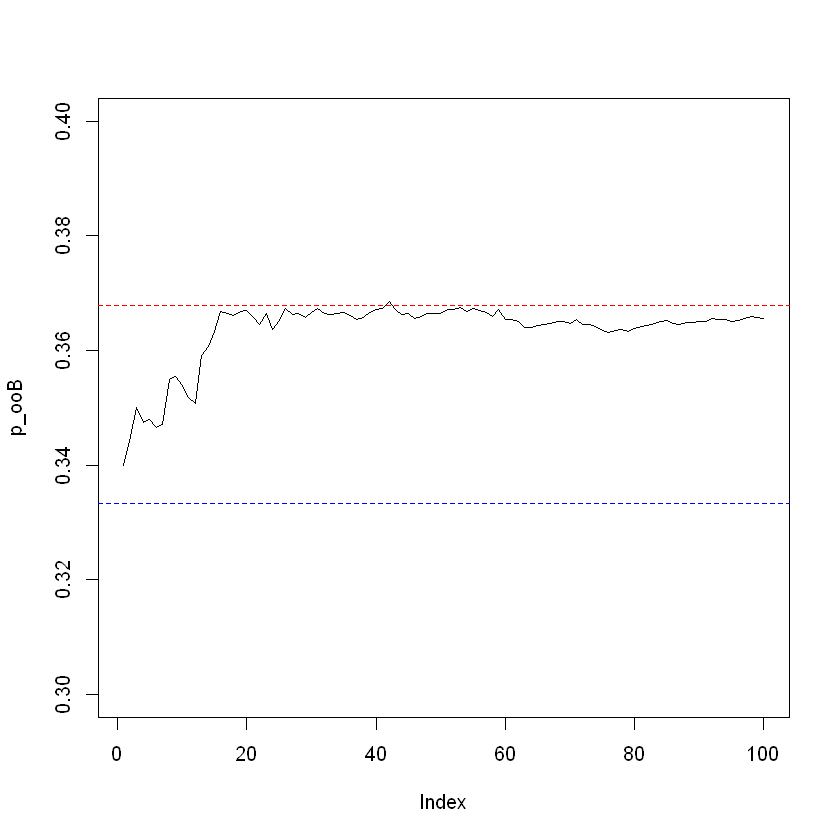

In [9]:
n <- 100
B <- 100
p_ooB <- n_ooB <- rep(NA, B)
for(i in 1:B){
    vec <- 1:n
    bs_sample <- sample(vec, size = n, replace = TRUE)
    # number of the out of bag values
    n_ooB[i] <- n - length(unique(bs_sample))

    # proportion of out of bag values so far.
    p_ooB[i] <- sum(n_ooB[1:i])/(i * n)
}
mean(n_ooB)/n
plot(p_ooB, type="l", ylim = c(0.3, 0.4))
abline(h = c(1/3, exp(-1)), col = c("blue", "red"), lty = 2)


3.2 Bootstrapped estimates and intervalls

[1] 5.692548

[1] 27.40044

[1] 38.10001

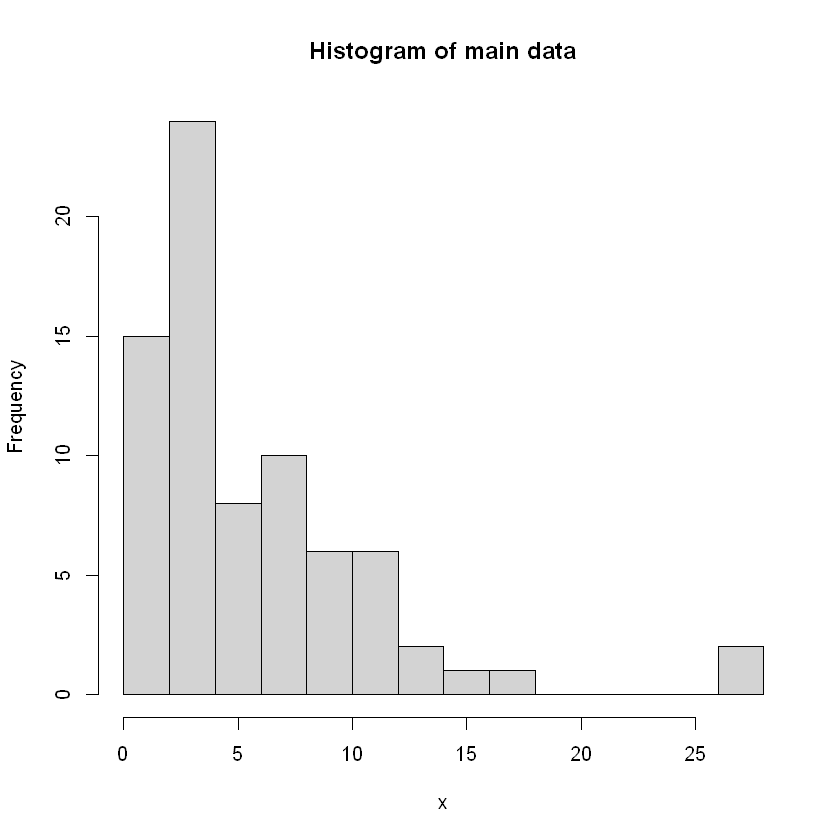

[1] 9.030282

2.5%    97.5% 
12.70399 45.76131

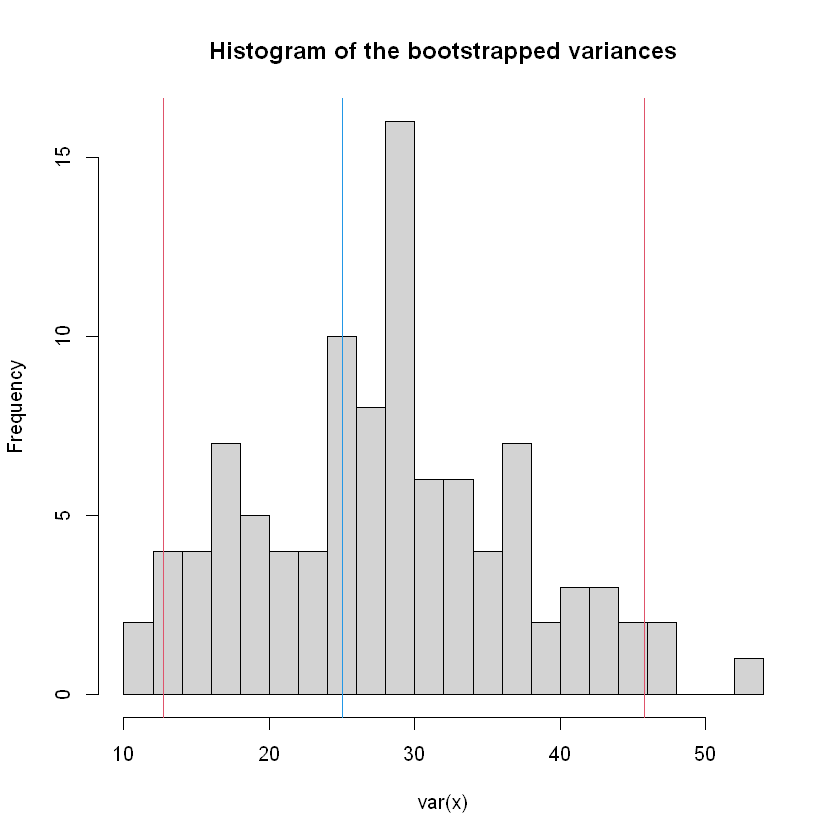

In [11]:
n <- 75 # sample size
lambda <- 0.2 # choose a parameter value somewhere between 0.01 to 0.05
x <- rexp(n, lambda) # simulate the main data
hist(x, breaks = 10, main = "Histogram of main data", xlab = "x")
mean(x) # mean of the original sample
var(x) # variance of the original sample
# take one resample (length 75 with replacement)
# and calculate the variance of the resample
resample <- sample(x, n, replace = T)
var(resample)

B <- 100 # 100 Bootstrap resamples
bsvar <- rep(NA, B)
for(i in 1:B){
    resample <- sample(x, n, replace = TRUE)
    bsvar[i] <- var(resample) # store the resampled mean for this iteration
}
hist(bsvar, breaks = 15,
main = "Histogram of the bootstrapped variances", xlab = "var(x)")
sd(bsvar) # bootstrap estimate of the standard deviation of our estimator
quantile(bsvar, c(0.025, 0.975)) # 95% Conf-Int
#how do you get a 90% CI?
#add the Conf-Int to the histogram
abline(v = quantile(bsvar, c(0.025, 0.975)), col = 2)
truevar <- 1/lambda^2
abline(v = truevar, col = 4)

4 Written Exercises